Predicted Non-fraud cases: 62302
Predicted Fraud cases: 3437
Accuracy: 0.9470025403489557
Precision: 0.013674716322374164
Recall: 0.3333333333333333
F1 Score: 0.02627166014533259
ROC-AUC: 0.7530311964622689


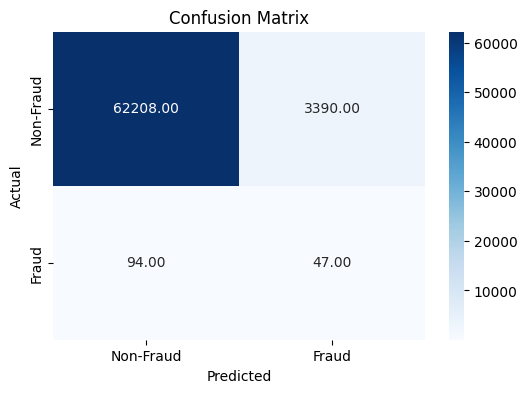

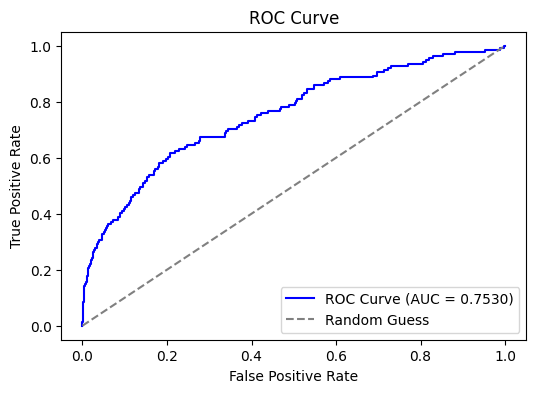

In [21]:
# xgboost
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# 讀取原始資料
train_data_path = r"C:\Users\坤達\Downloads\train.csv.zip"
data = pd.read_csv(train_data_path)

# 分離特徵與標籤
X = data.drop(columns=['Class', 'id'])  # 特徵
y = data['Class']  # 標籤

# 將資料分為訓練集和測試集，比例 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 對訓練集進行平衡
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 訓練 XGBoost 模型
xgb_model = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, objective="binary:logistic", random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

# 預測測試資料
test_predictions = xgb_model.predict(X_test)

# 計算詐欺和非詐欺的數量
non_fraud_count = sum(test_predictions == 0)
fraud_count = sum(test_predictions == 1)

# 打印結果
print("Predicted Non-fraud cases:", non_fraud_count)
print("Predicted Fraud cases:", fraud_count)

accuracy = accuracy_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
import numpy as np

# 計算混淆矩陣
y_test_pred = xgb_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_test_pred)



# 可視化混淆矩陣（百分比形式）
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True,fmt=".2f", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 計算 ROC 曲線和 AUC 值
y_test_proba = xgb_model.predict_proba(X_test)[:, 1]  # 詐欺類別的預測概率
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# 可視化 ROC 曲線
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

Predicted Non-fraud cases: 52601
Predicted Fraud cases: 13138
Accuracy: 0.8005293661296947
Precision: 0.006317552138833917
Recall: 0.5886524822695035
F1 Score: 0.012500941335943972
ROC-AUC: 0.7105803368421325


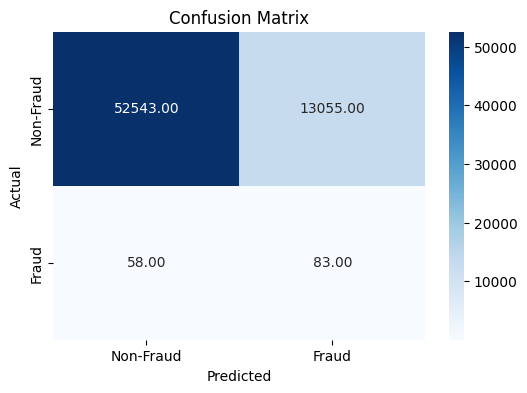

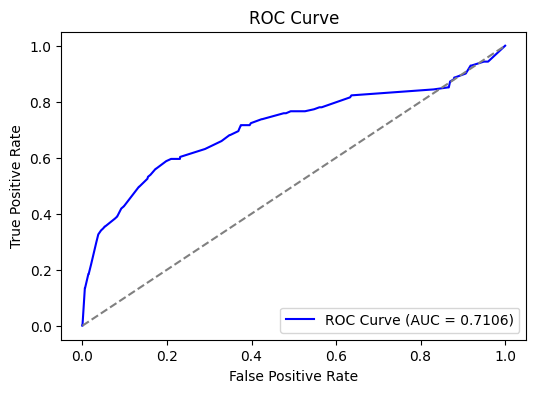

In [ ]:
# decision tree
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 讀取原始資料
train_data_path =r"C:\Users\坤達\Downloads\train.csv.zip"
data = pd.read_csv(train_data_path)

# 分離特徵與標籤
X = data.drop(columns=['Class', 'id'])  # 特徵
y = data['Class']  # 標籤

# 將資料分為訓練集和測試集，比例 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# 對訓練集進行平衡
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# 訓練 Decision Tree 模型
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)

# 預測測試資料
test_predictions = dt_model.predict(X_test)

# 計算詐欺和非詐欺的數量
non_fraud_count = sum(test_predictions == 0)
fraud_count = sum(test_predictions == 1)

# 打印結果
print("Predicted Non-fraud cases:", non_fraud_count)
print("Predicted Fraud cases:", fraud_count)

accuracy = accuracy_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

# 可視化
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay

# 計算混淆矩陣
y_test_pred = dt_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_test_pred)


# 可視化混淆矩陣（百分比形式）
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt=".2f", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 計算 ROC 曲線和 AUC 值
y_test_proba = dt_model.predict_proba(X_test)[:, 1]  # 取詐欺類別的概率
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# 可視化 ROC 曲線
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

Predicted Non-fraud cases: 60394
Predicted Fraud cases: 5345
Accuracy: 0.9184958700314881
Precision: 0.01197380729653882
Recall: 0.45390070921985815
F1 Score: 0.023332118118847976
ROC-AUC: 0.7836025315596242


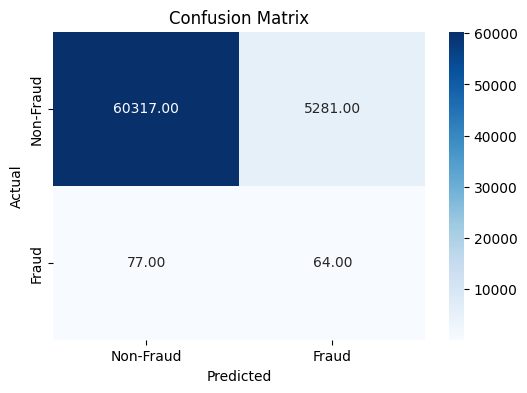

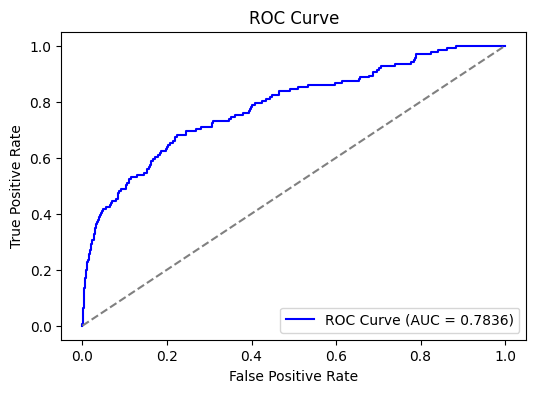

In [23]:
# RandomForest
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 讀取原始資料
train_data_path = r"C:\Users\坤達\Downloads\train.csv.zip"
data = pd.read_csv(train_data_path)

# 分離特徵與標籤
X = data.drop(columns=['Class', 'id'])  # 特徵
y = data['Class']  # 標籤

# 將資料分為訓練集和測試集，比例 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# 對訓練集進行平衡
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 訓練 Random Forest 模型
rf_model = RandomForestClassifier(n_estimators=100,max_depth=7, random_state=42, class_weight="balanced")
rf_model.fit(X_train_resampled, y_train_resampled)

# 預測測試資料
test_predictions = rf_model.predict(X_test)

# 計算詐欺和非詐欺的數量
non_fraud_count = sum(test_predictions == 0)
fraud_count = sum(test_predictions == 1)

# 打印結果
print("Predicted Non-fraud cases:", non_fraud_count)
print("Predicted Fraud cases:", fraud_count)

accuracy = accuracy_score(y_test,test_predictions)
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

# 可視化
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay

# 計算混淆矩陣
y_test_pred = rf_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_test_pred)


# 可視化混淆矩陣（百分比形式）
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt=".2f", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 計算 ROC 曲線和 AUC 值
y_test_proba = rf_model.predict_proba(X_test)[:, 1]  # 取詐欺類別的概率
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# 可視化 ROC 曲線
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# KNN

Predicted Non-fraud cases: 57693
Predicted Fraud cases: 8046

Performance on Test Set:
Accuracy: 0.8765877180973243
Precision: 0.004598558289833458
Recall: 0.2624113475177305
F1 Score: 0.009038719921827287
ROC AUC: 0.5756876344828883


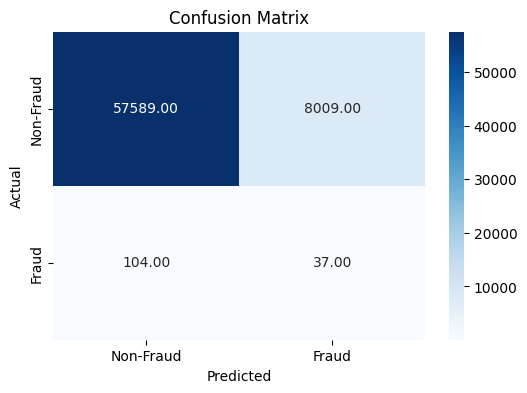

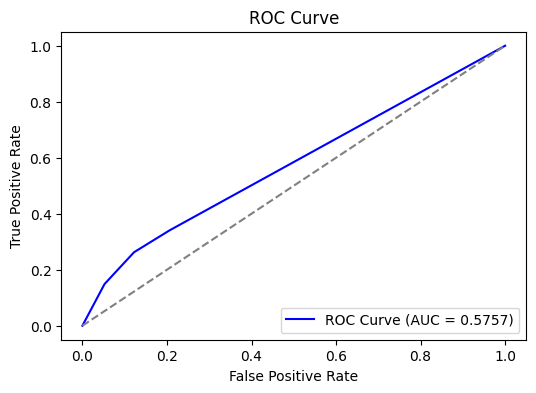

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


train_data_path = r"C:\Users\坤達\Downloads\train.csv.zip"
train_data = pd.read_csv(train_data_path)

X = train_data.drop(columns=['Class', 'id'])
y = train_data['Class']

# 將資料分為訓練集和測試集，比例 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# 對訓練集進行平衡
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_resampled, y_train_resampled)

# 預測測試資料
test_predictions = knn_model.predict(X_test)

# 計算詐欺和非詐欺的數量
non_fraud_count = sum(test_predictions == 0)
fraud_count = sum(test_predictions == 1)

# 打印結果
print("Predicted Non-fraud cases:", non_fraud_count)
print("Predicted Fraud cases:", fraud_count)

# 績效評估 (針對測試資料進行交叉驗證)
test_predictions = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])

print("\nPerformance on Test Set:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)

# 計算混淆矩陣
y_test_pred = knn_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_test_pred)

# 可視化混淆矩陣（百分比形式）
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt=".2f", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 計算 ROC 曲線和 AUC 值
y_test_proba = knn_model.predict_proba(X_test)[:, 1]  # 取詐欺類別的概率
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# 可視化 ROC 曲線
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()